# Autoencoder

Dimension Reduction dari dua kelas citra dengan menggunakan algoritma Autoencoder
secara optimal

## a

Lakukan loading dan scaling data serta tampilkan contoh data yang digunakan. Kemudian pisahkan dataset menjadi 80% training set, 10% validation set dan 10% test set.

In [ ]:
import idx2numpy
import numpy as np

# PASTIKAN BAHWA TRAINING DAN TESTING DATA MAUPUN LABEL BERADA DI FOLDER YANG SAMA

train_file = 'train-images-idx3-ubyte'
test_file = 't10k-images-idx3-ubyte'
train_label = 'train-labels-idx1-ubyte'
test_label = 't10k-labels-idx1-ubyte'

In [ ]:
# Convert files to numpy arrays
x_train = idx2numpy.convert_from_file(train_file)
y_train = idx2numpy.convert_from_file(train_label)
x_test = idx2numpy.convert_from_file(test_file)
y_test = idx2numpy.convert_from_file(test_label)

# Filter the data to include only labels 0 and 1
train_filter = (y_train == 0) | (y_train == 1)
test_filter = (y_test == 0) | (y_test == 1)

x_train = x_train[train_filter]
y_train = y_train[train_filter]
x_test = x_test[test_filter]
y_test = y_test[test_filter]

# Normalize the images
x_train = x_train.astype('float32') / 255.0 # 255 is the maximum value of a pixel
x_test = x_test.astype('float32') / 255.0 # membantu algoritma konvergen lebih cepat dan meningkatkan stabilitas numerik

# Check the shapes of the data
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (12000, 28, 28)
y_train shape: (12000,)
x_test shape: (2000, 28, 28)
y_test shape: (2000,)


In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split data into train, validation, and test sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5, random_state=42)

print(f'New x_train shape: {x_train.shape}')
print(f'New y_train shape: {y_train.shape}')
print(f'x_val shape: {x_val.shape}')
print(f'y_val shape: {y_val.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

New x_train shape: (9600, 28, 28)
New y_train shape: (9600,)
x_val shape: (1200, 28, 28)
y_val shape: (1200,)
x_test shape: (1200, 28, 28)
y_test shape: (1200,)


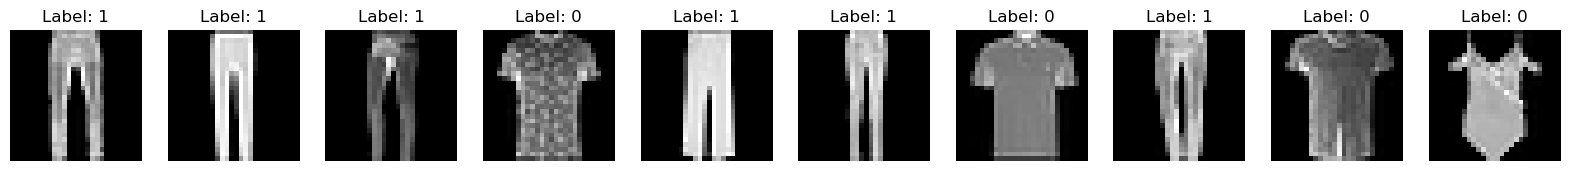

In [ ]:
# Display some example images
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    ax = axes[i]
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')
plt.show()

## b

Buatlah arsitektur baseline untuk Dimension Reduction dari dimensi 784 (28x28) menjadi dimensi 128, sesuai dengan gambar arsitektur Autoencoder berikut ini.

Lakukan evaluasi kualitas citra hasil decoder menggunakan Structural Similarity Index (SSIM) pada data test.

![alt text](image-3.png)

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Reshape, UpSampling2D, Conv2DTranspose, Dropout
import tensorflow as tf
from tensorflow.keras.models import Model
from skimage.metrics import structural_similarity as ssim

In [ ]:
# Encoder
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
encoded = Dense(128, activation='relu')(x)

# Decoder
x = Dense(14 * 14 * 32, activation='relu')(encoded)
x = Reshape((14, 14, 32))(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder Model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(x_val, x_val))

# Evaluate the model on test set
decoded_imgs = autoencoder.predict(x_test)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 0.4672 - val_loss: 0.3017
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.2954 - val_loss: 0.2761
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.2719 - val_loss: 0.2661
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.2636 - val_loss: 0.2607
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.2584 - val_loss: 0.2570
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.2549 - val_loss: 0.2549
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.2532 - val_loss: 0.2525
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.2497 - val_loss: 0.2512
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.2484 - val_loss: 0.2505
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 0.2489 - val_loss: 0.2496
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.2473 - val_loss: 0.2485
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.2

In [ ]:
# Calculate SSIM
ssim_scores = []
for i in range(len(x_test)):
    score = ssim(x_test[i].squeeze(), decoded_imgs[i].squeeze(), data_range=decoded_imgs[i].max() - decoded_imgs[i].min())
    ssim_scores.append(score)

mean_ssim = np.mean(ssim_scores)
print(f'Mean SSIM: {mean_ssim}')

Mean SSIM: 0.8772565839737205


Model yang telah dibuat mendapatkan nilai rata-rata SSIM yang cukup memuaskan yakni 0.877.

- Ini menunjukkan bahwa gambar rekonstruksi sangat mirip dengan gambar asli.
- Semakin tinggi nilai SSIM, semakin baik kualitas rekonstruksi.

C:\Users\nperd\AppData\Local\Temp\ipykernel_31820\2206492432.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(2, n, i + 1)


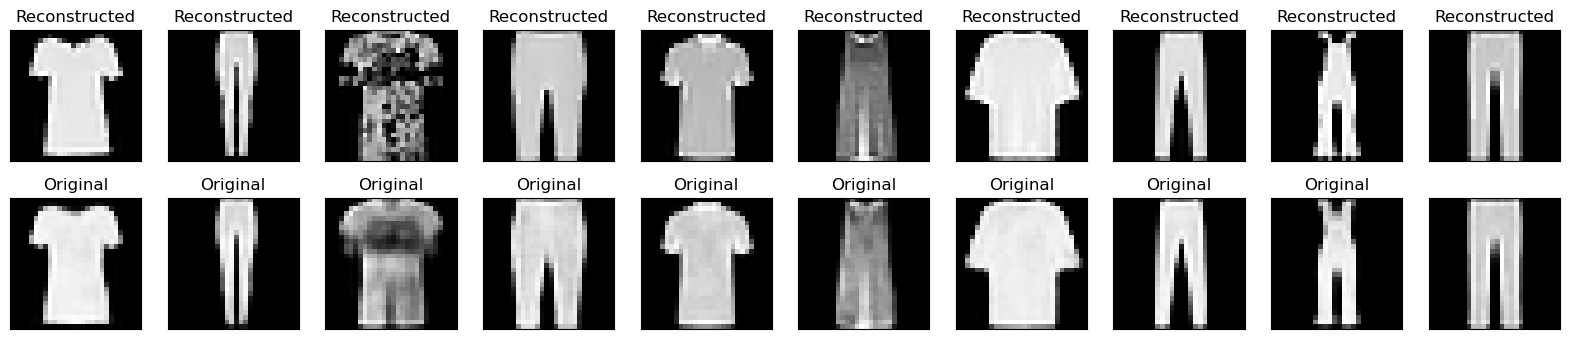

In [ ]:
# Display original and decoded images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    plt.title('Original')
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    plt.title('Reconstructed')
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## c

modifikasi arsitektur Autoencoder di atas agar mendapatkan representasi Dimension Reduction yang optimal dengan membandingkan hasil Structural Similarity Index (SSIM) nya. Dan selanjutnya lakukan proses tuning hyperparameter agar unjuk kerjanya meningkat. Berikan alasan mengapa modifikasi arsitektur dan metode tuning hyperparameter kalian lebih baik.

In [ ]:
import keras_tuner as kt

def build_model(hp):
    input_img = Input(shape=(28, 28, 1))

    # Encoder
    x = Conv2D(hp.Int('conv_1_filters', min_value=32, max_value=128, step=32),
               (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(hp.Int('conv_2_filters', min_value=32, max_value=128, step=32),
               (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Flatten()(x)
    x = Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1))(x)
    encoded = Dense(128, activation='relu')(x)

    # Decoder
    x = Dense(7 * 7 * hp.Int('conv_2_filters', min_value=32, max_value=128, step=32),
              activation='relu')(encoded)
    x = Reshape((7, 7, hp.Int('conv_2_filters', min_value=32, max_value=128, step=32)))(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2DTranspose(hp.Int('conv_1_filters', min_value=32, max_value=128, step=32),
                        (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
                        loss='binary_crossentropy')

    return autoencoder

tuner = kt.Hyperband(build_model,
                     objective='val_loss',
                     max_epochs=50,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

tuner.search(x_train, x_train, epochs=50, validation_data=(x_val, x_val))

best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:")
print(best_hyperparameters)


Trial 90 Complete [00h 01m 23s]
val_loss: 0.2433670312166214

Best val_loss So Far: 0.24046702682971954
Total elapsed time: 00h 38m 04s
Best Hyperparameters:


In [ ]:
print("Best Hyperparameters:")
for param in best_hyperparameters.values:
    print(f"{param}: {best_hyperparameters.get(param)}")

Best Hyperparameters:
conv_1_filters: 128
conv_2_filters: 128
dropout: 0.1
optimizer: adam
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0075


In [ ]:
# Encoder
input_img = Input(shape=(28, 28, 1))
x = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dropout(0.1)(x)
encoded = Dense(128, activation='relu')(x)

# Decoder
x = Dense(7 * 7 * 128, activation='relu')(encoded)
x = Reshape((7, 7, 128))(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder Model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
history = autoencoder.fit(x_train, x_train,
                          epochs=80,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(x_val, x_val))

# Evaluate the model on test set
decoded_imgs = autoencoder.predict(x_test)

Epoch 1/80
75/75 ━━━━━━━━━━━━━━━━━━━━ 24s 268ms/step - loss: 0.4146 - val_loss: 0.2879
Epoch 2/80
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 251ms/step - loss: 0.2796 - val_loss: 0.2684
Epoch 3/80
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 252ms/step - loss: 0.2652 - val_loss: 0.2611
Epoch 4/80
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 255ms/step - loss: 0.2595 - val_loss: 0.2575
Epoch 5/80
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 251ms/step - loss: 0.2553 - val_loss: 0.2553
Epoch 6/80
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 290ms/step - loss: 0.2540 - val_loss: 0.2527
Epoch 7/80
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 257ms/step - loss: 0.2515 - val_loss: 0.2509
Epoch 8/80
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 270ms/step - loss: 0.2514 - val_loss: 0.2512
Epoch 9/80
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 260ms/step - loss: 0.2481 - val_loss: 0.2495
Epoch 10/80
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 274ms/step - loss: 0.2484 - val_loss: 0.2491
Epoch 11/80
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 283ms/step - loss: 0.2472 - val_loss: 0.2483
Epoch 12/80
75/75 ━━━━━━━━━━━━━━━━━━━━ 21

In [ ]:
# Calculate SSIM
ssim_scores = []
for i in range(len(x_test)):
    score = ssim(x_test[i].squeeze(), decoded_imgs[i].squeeze(), data_range=decoded_imgs[i].max() - decoded_imgs[i].min())
    ssim_scores.append(score)

mean_ssim = np.mean(ssim_scores)
print(f'Mean SSIM: {mean_ssim}')

Mean SSIM: 0.8872532565252164


Perubahan yang dilakukan ke model ini yakni pada:

- **Penambahan dropout** : Dropout 0.1 membantu mengurangi overfitting dengan mematikan sebagian neuron selama pelatihan.
- **Pemakaian Conv2DTranspose** : Dibandingkan dengan metode upsampling sederhana seperti UpSampling2D yang mengulang piksel-piksel dalam grid tanpa belajar pola, Conv2DTranspose mempelajari pola dalam data dan menghasilkan rekonstruksi yang lebih baik dan lebih halus.
- **Penambahan filter**: Penambahan jumlah filter membantu model menangkap lebih banyak fitur dari gambar.